In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import eig
plt.rcParams.update({'font.size': 22, 'lines.markersize':15, 'lines.linewidth':3})

In [ ]:
def basis_functions(N, a=5):
  lambda_f_c = lambda x, k: np.cos(np.pi*k*x/a)*np.sqrt(1/a)
  lambda_d2f_c = lambda x, k:-(np.pi*k/a)**2*np.cos(np.pi*k*x/a)*np.sqrt(1/a)
  f = [lambda x: np.ones_like(x)/np.sqrt(2*a)]
  d2f = [lambda x: 0*x]
  for i in range(1, N//2+1):
    f.append(lambda x, k=i: lambda_f_c(x, k))
    d2f.append(lambda x, k=i: lambda_d2f_c(x, k))

  lambda_f_s = lambda x, k: np.sin(np.pi*k*x/a)*np.sqrt(1/a)
  lambda_d2f_s = lambda x, k: -(np.pi*k/a)**2*np.sin(np.pi*k*x/a)*np.sqrt(1/a)
  for i in range(1, N//2+1):
    f.append(lambda x, k=i: lambda_f_s(x, k))
    d2f.append(lambda x, k=i: lambda_d2f_s(x, k))

  return f, d2f

def linear_operator(f, d2f, a=5):
  A = np.zeros((len(f), len(f)))
  for i in range(len(f)):
      for j in range(len(f)):
            matrix_element = lambda x: f[i](x)*(-d2f[j](x) + x**2*f[j](x))
            A[i, j] = quad(matrix_element, -a, a)[0]
  return A

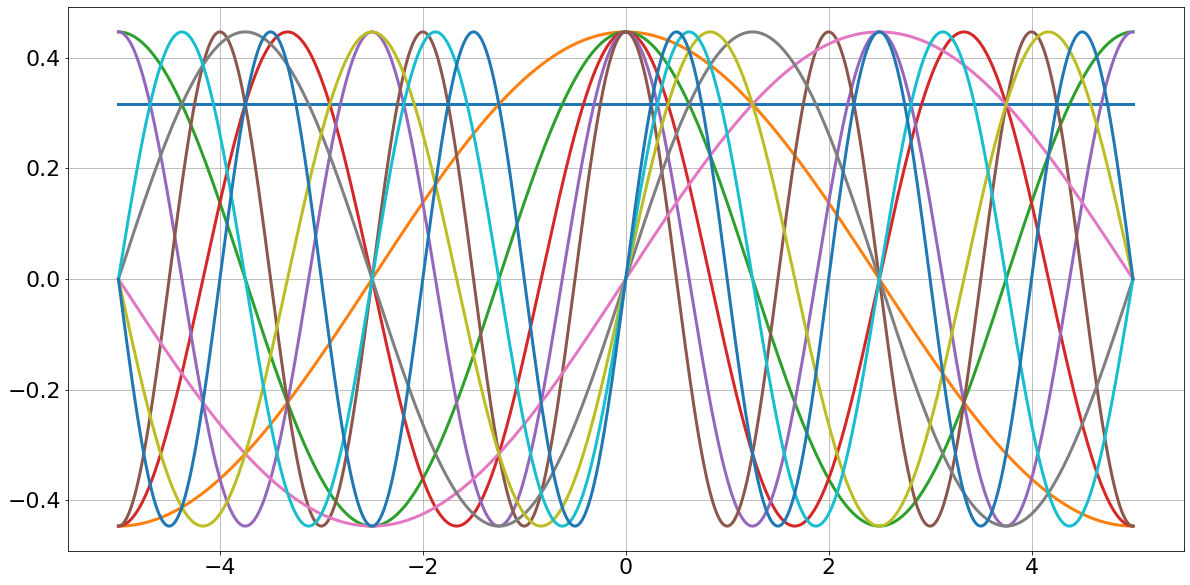

In [ ]:
n = 10
f, d2f = basis_functions(n)
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(figsize=(20,10))
for i in range(len(f)):
  ax.plot(x, f[i](x))
ax.grid()

In [ ]:
n = 50
f, d2f = basis_functions(n)
A = linear_operator(f, d2f)
E = eig(A)

eig_val = np.real(E[0])
eig_vec = E[1]
order = np.argsort(eig_val)
e_vals = eig_val[order]
e_vecs = eig_vec[:, order]

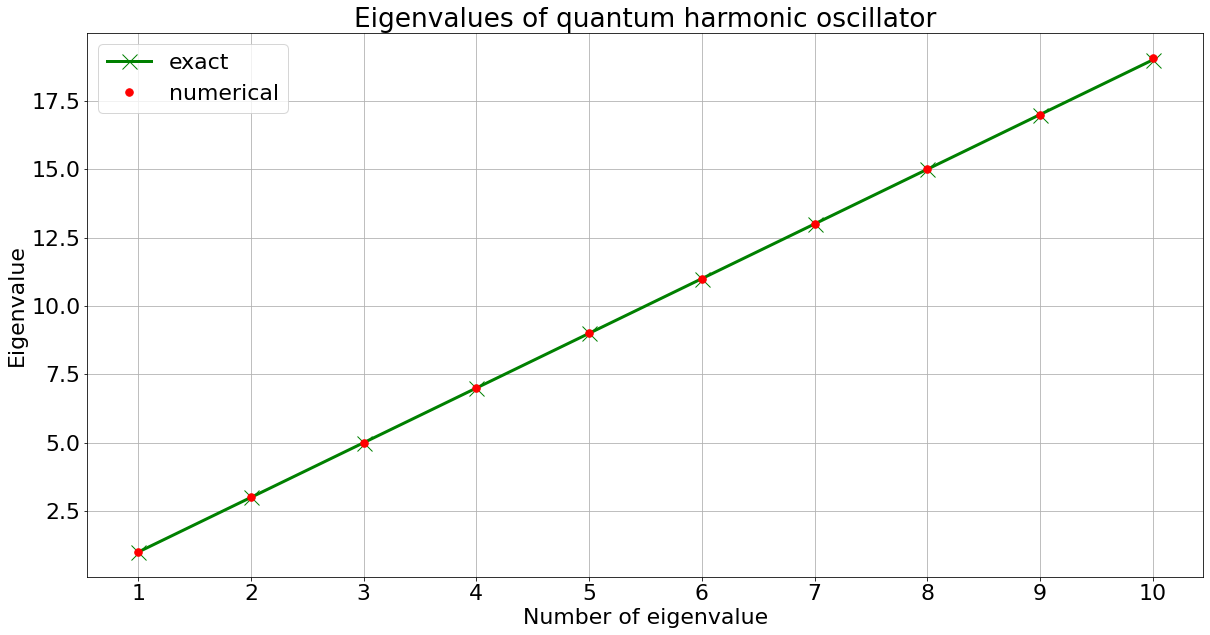

In [ ]:
# Comparison with the theory
# Write the exact eigenvalues and choose which to plot
e_exact = 2*np.arange(n+1) + 1;           
e_end = min(10,n);                        

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.arange(1,e_end+1),e_exact[:e_end],'gx-')
ax.plot(np.arange(1,e_end+1),e_vals[:e_end],'r.')
ax.grid()
ax.set_xticks(np.arange(1,e_end+1))
ax.legend(['exact','numerical']); 
ax.set_title('Eigenvalues of quantum harmonic oscillator');
ax.set_xlabel('Number of eigenvalue')
ax.set_ylabel('Eigenvalue');

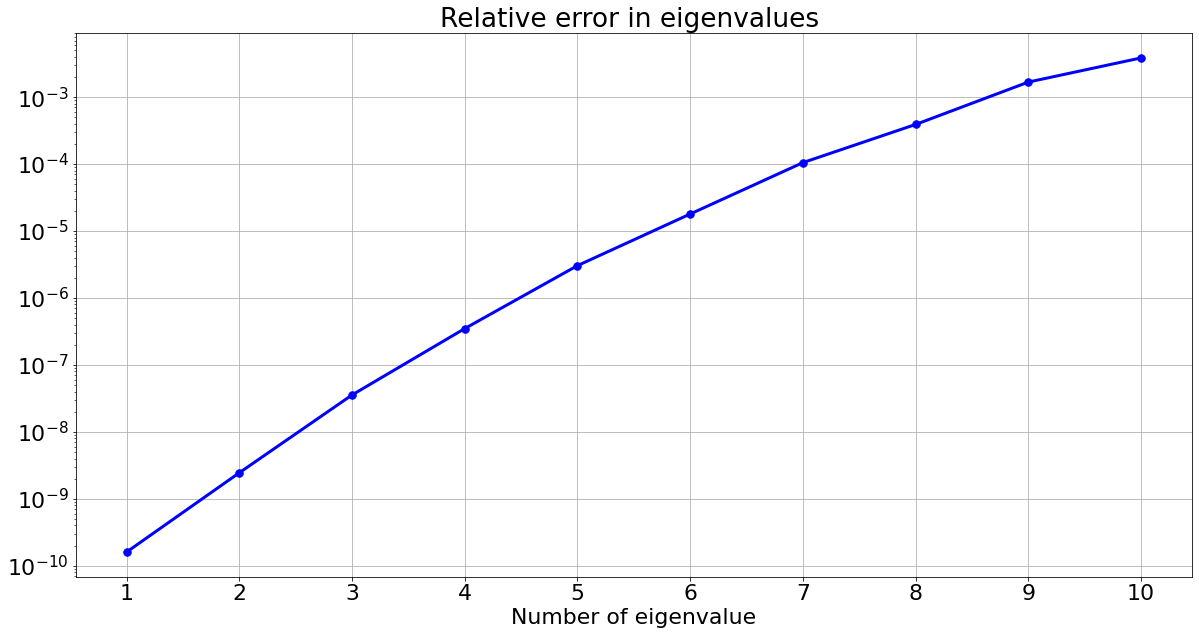

In [ ]:
# Plot the relative error. USE SEMILOG AXES
err = (e_exact[:e_end] - e_vals[:e_end])/e_exact[:e_end];

fig, ax = plt.subplots(figsize=(20,10))
ax.semilogy(np.arange(1,e_end+1),abs(err),'b.-')
ax.grid()
ax.set_title('Relative error in eigenvalues ')
ax.set_xticks(np.arange(1,e_end+1))
ax.set_xlabel('Number of eigenvalue');

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
for i in range(5):
    wave = np.sum(np.array([f[k](x)*e_vecs[k, i] for k in range(len(f))]), axis=0)
    ax.plot(x, wave, '-');
ax.grid()
ax.legend(list(map(lambda x: f'{x+1}', nn)) );
ax.set_title(f'Wavefunctions of quantum harmonic oscillator');